In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
columns = ('ImageName', 'threshold_canny', 'kernel_size_blur', 'area_convex_hull', 'area_contour','area_ellipse', 'circularity_hull',
           'circularity_contour')

# dataframe
df = pd.DataFrame(columns=columns)

In [11]:
data = {'ImageName': 'C:\\Users\\Ankur\\Desktop\\Uni Siegen\\SEM5\\Eye Detection\\Project-code-Ankur\\master-thesis-eye-tracking\\Results\\Hough21_01_2022_16_01_18\\hough_circle1.png', 'threshold_canny': 5, 'kernel_size_blur': 13, 'area_convex_hull': 1900.5, 'area_contour': 1873.5, 'area_ellipse': 1886.6501108218602, 'circularity_hull': 0.9897057275897333, 'circularity_contour': 161.78174495697021}


In [12]:
df.append(data,ignore_index=True)

,ImageName,threshold_canny,kernel_size_blur,area_convex_hull,area_contour,area_ellipse,circularity_hull,circularity_contour
0,C:\Users\Ankur\Desktop\Uni Siegen\SEM5\Eye Det...,5,13,1900.5,1873.5,1886.650111,0.989706,161.781745


In [15]:
MEDIAN_BLUR_K_SIZE_VALUES = [9, 11, 13, 15, 17, 19, 21]
CANNY_THRESHOLD_VALUES = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 35, 40, 55] 
metrix_threshold_and_kernel = pd.DataFrame(index=MEDIAN_BLUR_K_SIZE_VALUES, columns=CANNY_THRESHOLD_VALUES)

In [16]:
metrix_threshold_and_kernel

,10,12,14,16,18,20,22,24,26,28,30,35,40,55
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
metrix_threshold_and_kernel.loc[9,10] = 3

In [18]:
metrix_threshold_and_kernel

,10,12,14,16,18,20,22,24,26,28,30,35,40,55
9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for i in MEDIAN_BLUR_K_SIZE_VALUES:
    for j in CANNY_THRESHOLD_VALUES:
        metrix_threshold_and_kernel.loc[i,j] = 10

In [20]:
metrix_threshold_and_kernel

,10,12,14,16,18,20,22,24,26,28,30,35,40,55
9,10,10,10,10,10,10,10,10,10,10,10,10,10,10
11,10,10,10,10,10,10,10,10,10,10,10,10,10,10
13,10,10,10,10,10,10,10,10,10,10,10,10,10,10
15,10,10,10,10,10,10,10,10,10,10,10,10,10,10
17,10,10,10,10,10,10,10,10,10,10,10,10,10,10
19,10,10,10,10,10,10,10,10,10,10,10,10,10,10
21,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [109]:
mean_data = pd.read_csv(r"C:\Users\Ankur\Desktop\Uni Siegen\SEM5\Eye Detection\Project-code-Ankur\master-thesis-eye-tracking\Results\mean17_03_2022_13_40_36.csv",index_col=0)
sigma_data = pd.read_csv(r"C:\Users\Ankur\Desktop\Uni Siegen\SEM5\Eye Detection\Project-code-Ankur\master-thesis-eye-tracking\Results\sigma17_03_2022_13_40_36.csv",index_col=0)

In [110]:
mean_data.head()

,4,6,8,10,12,14,16,18,20,22,24,26,28,30,35,40,55
7,74.841750,74.454436,104.868128,100.655272,101.538296,114.257802,116.733505,116.158038,117.345226,121.011702,119.107958,119.071411,122.879956,122.879956,122.879956,122.879956,122.879956
9,107.347591,104.259873,93.505417,91.903305,88.773456,97.207420,113.661667,113.661667,113.661667,113.661667,113.661667,113.661667,113.661667,113.661667,113.661667,113.661667,125.301480
11,79.813271,79.813271,102.065126,102.065126,102.065126,102.065126,102.065126,102.065126,102.065126,102.065126,102.065126,102.065126,102.065126,102.065126,102.065126,102.065126,122.215690
13,67.568961,78.493986,75.688108,84.059844,98.372451,98.963182,98.374965,98.963182,98.963182,98.963182,98.963182,98.963182,98.963182,98.963182,98.963182,98.963182,121.189113
15,69.746901,70.200760,79.310562,80.558784,90.448527,90.448527,90.448527,90.448527,90.448527,90.448527,90.448527,90.448527,90.448527,90.448527,90.448527,101.062992,105.824602


In [111]:
path = r"C:\Users\Ankur\Desktop\Uni Siegen\SEM5\Eye Detection\Project-code-Ankur\master-thesis-eye-tracking\Results"
os.path.basename(path)

'Results'

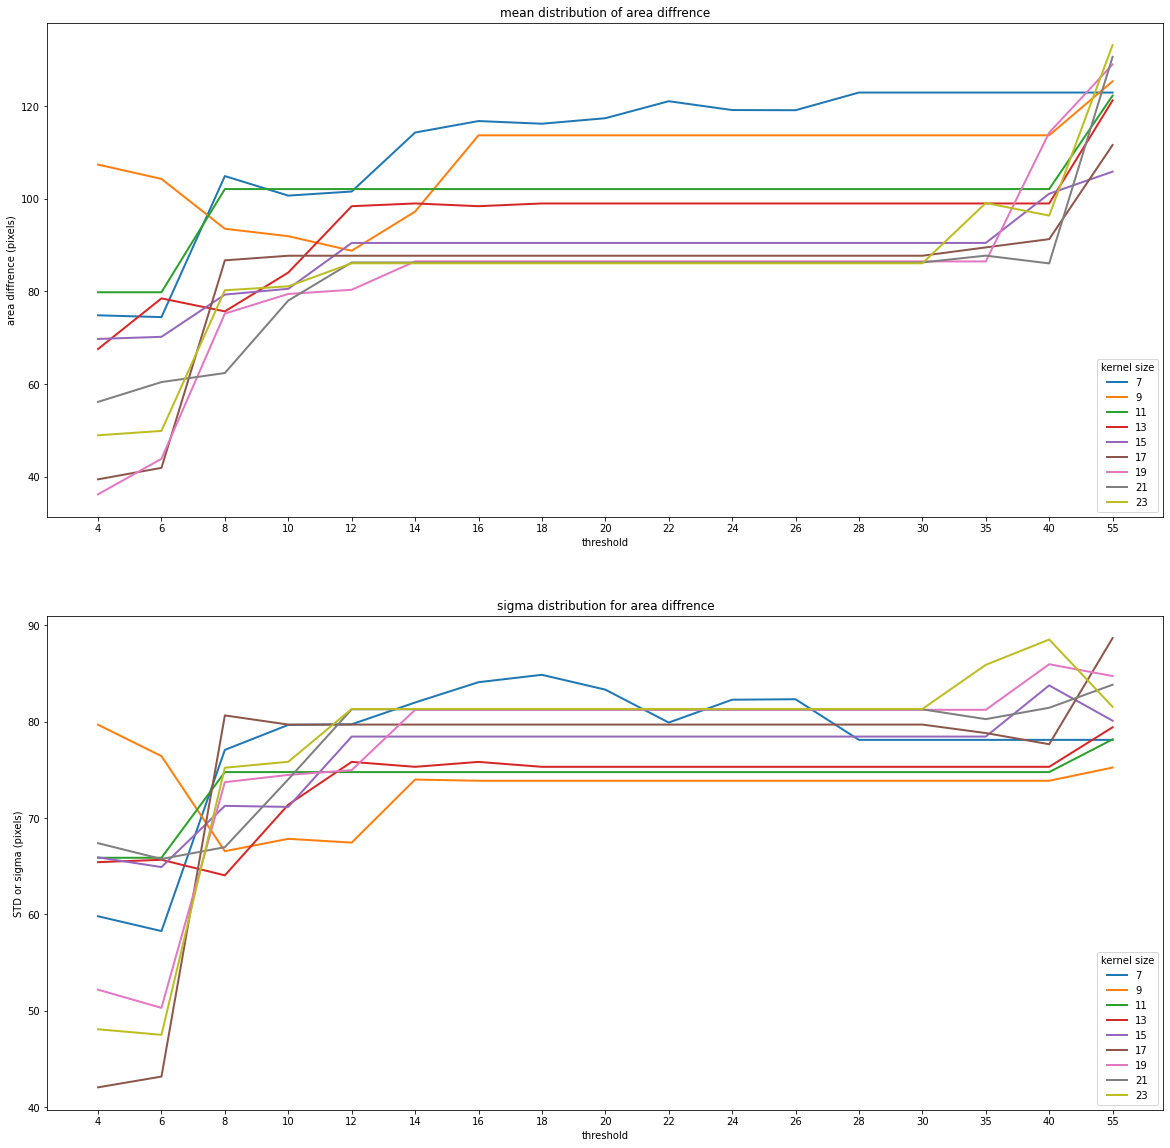

In [113]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(20, 20))
ax[0].set_xlabel("threshold")
ax[0].set_ylabel("area diffrence (pixels)")
ax[0].set_title("mean distribution of area diffrence")

ax[1].set_xlabel("threshold")
ax[1].set_ylabel("STD or sigma (pixels)")
ax[1].set_title("sigma distribution for area diffrence")
for label in mean_data.index:
    ax[0].plot(mean_data.columns,mean_data.loc[label],label=label,linewidth = 2)
    ax[1].plot(sigma_data.columns,sigma_data.loc[label],label=label, linewidth = 2)
ax[0].legend(title = "kernel size")
ax[1].legend(title = "kernel size")

In [68]:
np.shape(mean_data.loc[9])

(14,)

# EXP1 Dataset

In [115]:
path_mean = r"C:\Users\Ankur\Desktop\Uni Siegen\SEM5\Eye Detection\Project-code-Ankur\master-thesis-eye-tracking\Data\exp1\exp1_mean_17_03_2022_14_34_02.csv"
mean_data = pd.read_csv(path_mean,index_col=0)
sigma_data = pd.read_csv(r"C:\Users\Ankur\Desktop\Uni Siegen\SEM5\Eye Detection\Project-code-Ankur\master-thesis-eye-tracking\Data\exp1\exp1_sigma_17_03_2022_14_34_02.csv",index_col=0)

Text(0.5, 0.98, 'File name - exp1_mean_17_03_2022_14_34_02.csv')

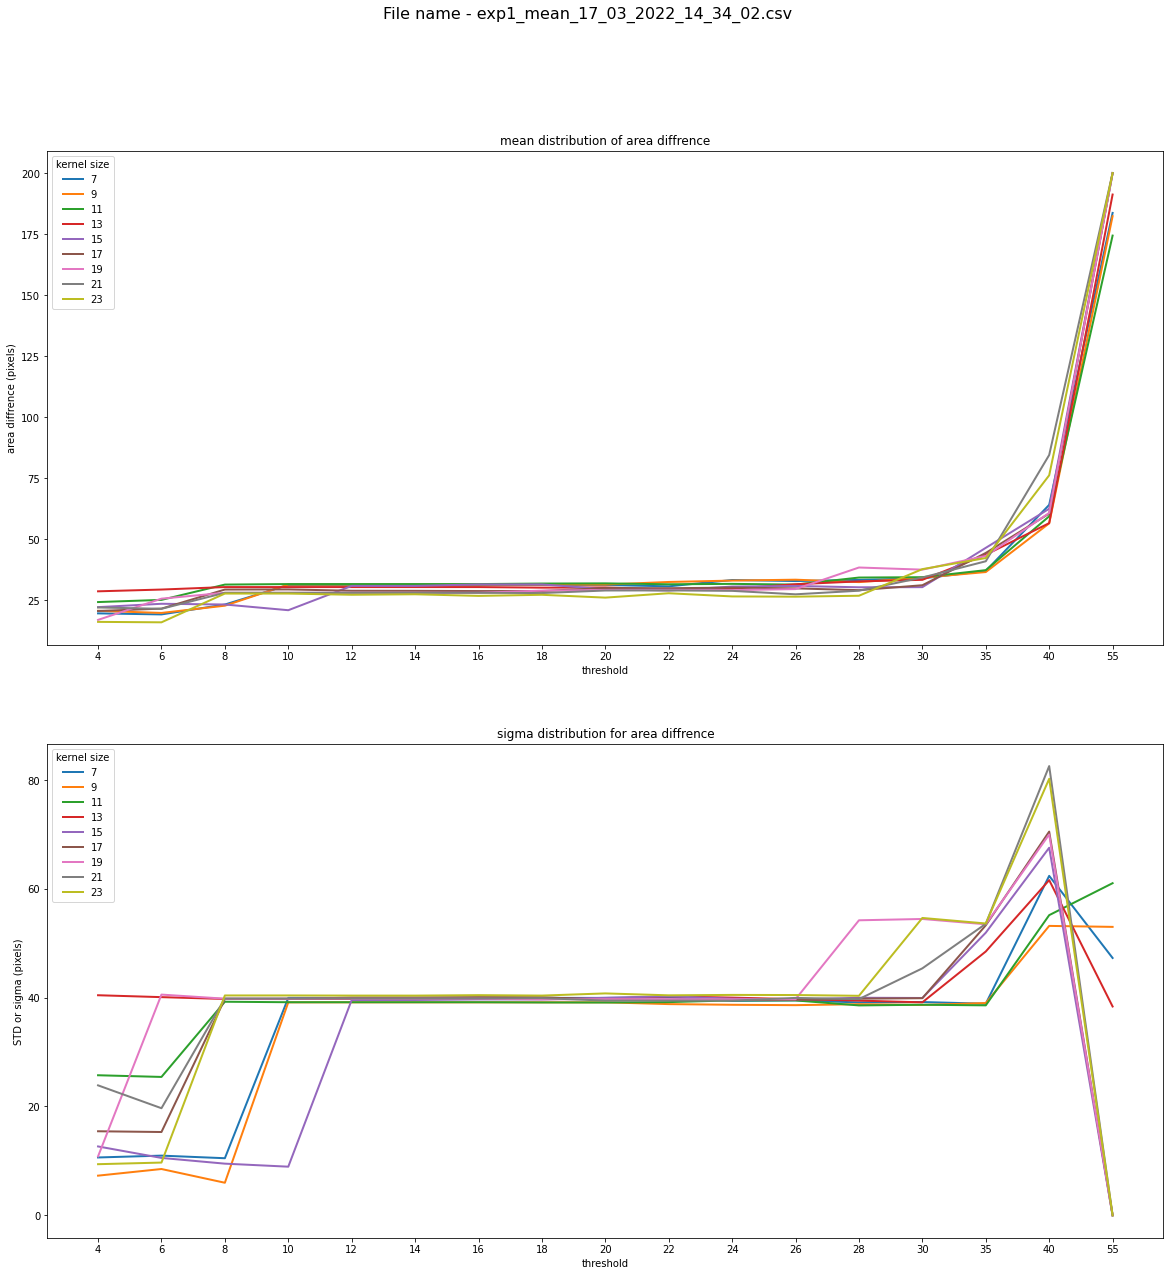

In [116]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(20, 20))
ax[0].set_xlabel("threshold")
ax[0].set_ylabel("area diffrence (pixels)")
ax[0].set_title("mean distribution of area diffrence")

ax[1].set_xlabel("threshold")
ax[1].set_ylabel("STD or sigma (pixels)")
ax[1].set_title("sigma distribution for area diffrence")
for label in mean_data.index:
    ax[0].plot(mean_data.columns,mean_data.loc[label],label=label,linewidth = 2)
    ax[1].plot(sigma_data.columns,sigma_data.loc[label],label=label, linewidth = 2)
ax[0].legend(title = "kernel size")
ax[1].legend(title = "kernel size")
fig.suptitle('File name - {}'.format(os.path.basename(path_mean)), fontsize=16)